# Research Questions

1. What are the top 10 highest ranked anime series?
2. Which anime series have the largest member/viewer base (top 10)?
3. What are the top 10 anime series with the most episodes?
4. Is there a correlation between the number of members/viewers and the anime's score rating?

In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

data_set = pd.DataFrame(
    columns=['rank', 'score', 'name', 'link', 'showType', 'numOfEp', 'startDate', 'endDate', 'members'])


ModuleNotFoundError: No module named 'pandas'

In [2]:
def insert_data(data_set, row_data):
    data_set.loc[len(data_set)] = row_data

In [3]:
 #                                    rank score  name  showtype  numOfEp    startDate   endDate     members

def extract_anime_data(anime_data: BeautifulSoup): #-> #[int, float, str, str, int, str, str, int]:
    rank = int(anime_data.find('span', class__='top-anime-rank-text').text.strip())
    score_tag = anime_data.find('span', class_='score-label')

    score_text = score_tag.text.strip()
    score = float(score_text) if score_text != 'N/A' else None #if score is N/A, set to None

    name = anime_data.find('h3', class_='anime_ranking_h3').a.text.strip()
    info_lines = anime_data.find('div', class_='information').text.strip().split('\n')

    type_and_eps = info_lines[0]
    showType = type_and_eps.split('(')[0].strip()
    numOfEp = int(type_and_eps.split('(')[1].split()[0])

    date_range = info_lines[1].split('-')
    startDate = date_range[0].strip()
    endDate = date_range[1].strip()

    members_line = info_lines[2].replace('members', '').strip()
    members = int(members_line.replace(',', ''))


    return [rank, score, name, showType, numOfEp, startDate, endDate, members]


In [4]:
def scrap_list_of_anime(page_number):
    url = f"https://myanimelist.net/topanime.php?limit={page_number * 50}"
    res = requests.get(url)
    soup = BeautifulSoup(res.text, 'html.parser')
    anime_cards = soup.find_all('tr', class_='ranking-list')
    for card in anime_cards:
        insert_data(data_set, extract_anime_data(card))

In [5]:
for i in range(0, 20):
    scrap_list_of_anime(i)
data_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   rank       1000 non-null   object
 1   score      1000 non-null   object
 2   name       1000 non-null   object
 3   link       1000 non-null   object
 4   showType   1000 non-null   object
 5   numOfEp    993 non-null    object
 6   startDate  1000 non-null   object
 7   endDate    1000 non-null   object
 8   members    1000 non-null   int64 
dtypes: int64(1), object(8)
memory usage: 78.1+ KB


In [6]:
data_set.to_csv('anime_data.csv')

# -----------------
# Data PreProcessing
# ------------------

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df_anime = pd.read_csv('anime_data.csv')
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   rank        1000 non-null   int64  
 2   score       1000 non-null   float64
 3   name        1000 non-null   object 
 4   link        1000 non-null   object 
 5   showType    1000 non-null   object 
 6   numOfEp     993 non-null    float64
 7   startDate   1000 non-null   object 
 8   endDate     980 non-null    object 
 9   members     1000 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


# 1. **Inspect the Data**


In [8]:
df_anime.info()
df_anime[['members', 'score']].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   rank        1000 non-null   int64  
 2   score       1000 non-null   float64
 3   name        1000 non-null   object 
 4   link        1000 non-null   object 
 5   showType    1000 non-null   object 
 6   numOfEp     993 non-null    float64
 7   startDate   1000 non-null   object 
 8   endDate     980 non-null    object 
 9   members     1000 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


,members,score
count,1.000000e+03,1000.000000
mean,4.475116e+05,8.177820
std,5.921132e+05,0.281335
min,1.305000e+03,7.820000
25%,7.370175e+04,7.940000
50%,2.284820e+05,8.120000
75%,5.733075e+05,8.340000
max,4.149307e+06,9.300000


# 2. fill missing Value

In [9]:
df_anime['members'].fillna(df_anime['members'].median(), inplace=True)
df_anime['score'].fillna(df_anime['score'].mean(), inplace=True)
df_anime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   rank        1000 non-null   int64  
 2   score       1000 non-null   float64
 3   name        1000 non-null   object 
 4   link        1000 non-null   object 
 5   showType    1000 non-null   object 
 6   numOfEp     993 non-null    float64
 7   startDate   1000 non-null   object 
 8   endDate     980 non-null    object 
 9   members     1000 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


C:\Users\mosta\AppData\Local\Temp\ipykernel_22416\1213074363.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_anime['members'].fillna(df_anime['members'].median(), inplace=True)
C:\Users\mosta\AppData\Local\Temp\ipykernel_22416\1213074363.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

# 3. Remove Duplicates

In [10]:
anime_dup = df_anime.drop_duplicates(subset=['members', 'score'])
anime_dup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   rank        1000 non-null   int64  
 2   score       1000 non-null   float64
 3   name        1000 non-null   object 
 4   link        1000 non-null   object 
 5   showType    1000 non-null   object 
 6   numOfEp     993 non-null    float64
 7   startDate   1000 non-null   object 
 8   endDate     980 non-null    object 
 9   members     1000 non-null   int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


### Save cleaned data

In [11]:
df_anime.to_csv('anime_cleaned_data.csv')

# Insights analysis

In [12]:
df_anime = pd.read_csv('anime_cleaned_data.csv')

# What are the top 10 highest score anime series?

,name,score
0,Sousou no Frieren,9.30
1,Fullmetal Alchemist: Brotherhood,9.10
2,Steins;Gate,9.07
3,Shingeki no Kyojin Season 3 Part 2,9.05
4,One Piece Fan Letter,9.05
5,Gintama°,9.05
6,Gintama: The Final,9.04
7,Hunter x Hunter (2011),9.03
8,Gintama',9.02
9,Gintama': Enchousen,9.02


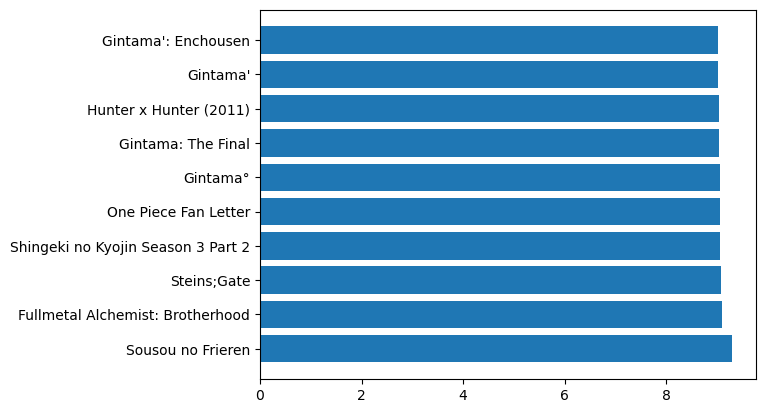

In [13]:
top_anime = df_anime.sort_values(by='score', ascending=False)

top_10 = top_anime.head(10)
plt.barh(top_10['name'], top_10['score'])
top_10[['name', 'score']]


# Which anime series have the largest member/viewer base (top 10)?

,members,name
114,4149307,Shingeki no Kyojin
88,4093938,Death Note
1,3512755,Fullmetal Alchemist: Brotherhood
148,3374211,One Punch Man
173,3240283,Kimetsu no Yaiba
951,3161784,Boku no Hero Academia
7,3012257,Hunter x Hunter (2011)
662,2983630,Naruto
27,2888568,Kimi no Na wa.
125,2870073,Shingeki no Kyojin Season 2


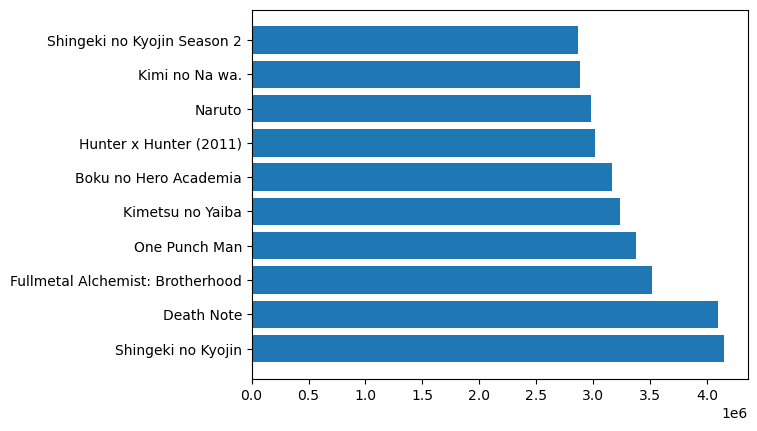

In [14]:
top_anime = df_anime.sort_values(by='members', ascending=False)

top_10 = top_anime.head(10)
plt.barh(top_10['name'], top_10['members'])
top_10[['members', 'name']]

# What are the top 10 anime series with the most episodes?

,numOfEp,name
887,1787.0,Doraemon (1979)
306,500.0,Naruto: Shippuuden
710,366.0,Bleach
387,291.0,Dragon Ball Z
249,237.0,Douluo Dalu 2nd Season
903,234.0,Wanmei Shijie
662,220.0,Naruto
493,203.0,Katekyou Hitman Reborn!
16,201.0,Gintama
938,178.0,Tennis no Oujisama


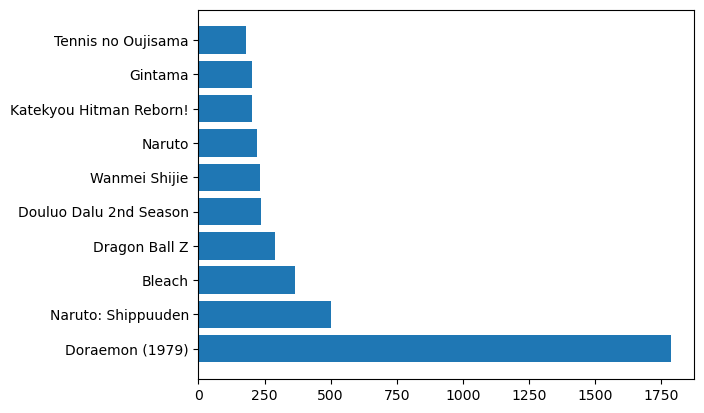

In [15]:
top_anime_by_episodes = df_anime.sort_values(by='numOfEp', ascending=False)
top_10_episodes = top_anime_by_episodes.head(10)
plt.barh(top_10_episodes['name'], top_10_episodes['numOfEp'])
top_10_episodes[['numOfEp', 'name']]


# Is there a correlation between the number of members/viewers and the anime's score rating?

In [16]:
animeCorr = df_anime.dropna(subset=['members', 'score'])

# Calculate the correlation coefficient
corr = animeCorr['members'].corr(animeCorr['score'])
print('correlation coefficient:', corr)

correlation coefficient: 0.32513946891434986


### there is Positive correlation between the number of members viewers and the anime score rating:

# What are the lowest 10 ranked anime series?

In [17]:
bottom_anime = df_anime.sort_values(by='rank', ascending=True)

bottom_10 = bottom_anime.tail(10)
bottom_10[['rank', 'name']]


,rank,name
990,991,"Komi-san wa, Comyushou desu."
991,992,Kuroko no Basket Movie 3: Winter Cup - Tobira ...
992,993,Mairimashita! Iruma-kun 3rd Season
993,994,New Initial D Movie: Legend 2 - Tousou
994,995,One Piece Film: Red
995,996,Seitokai Yakuindomo Movie
996,997,Somali to Mori no Kamisama
997,998,Sonny Boy
998,999,Suzumiya Haruhi no Yuuutsu
999,1000,Tokyo Revengers: Tenjiku-hen
